# Soil Parameter Datasets

*Martin Vonk (2025)*

## Overview

When measured data is unavailable, soil hydraulic parameters can be obtained from established parameter databases. These databases contain pre-determined parameter sets for common soils based on hundreds of laboratory measurements and professional judgment.

`pedon` integrates soil parameter data from three major sources:
1. **HYDRUS database** - Parameter sets from Carsel & Parrish (1988), widely used in HYDRUS and other simulators
2. **VS2D database** - Additional parameter sets in both Brooks-Corey and van Genuchten formats
3. **Staring series** - Dutch soil parameters based on BOFEK classification with many measured samples

This notebook shows how to access these databases and understand their characteristics.

In [6]:
import pedon as pe

In [7]:
# list all soil types for van genuchten
pe.Soil.list_names(pe.Genuchten)

['Sand',
 'Loamy Sand',
 'Sandy Loam',
 'Loam',
 'Silt',
 'Silt Loam',
 'Sandy Clay Loam',
 'Clay Loam',
 'Silty Clay Loam',
 'Sandy Clay',
 'Silty Clay',
 'Clay',
 'B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B09',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'O01',
 'O02',
 'O03',
 'O04',
 'O05',
 'O06',
 'O07',
 'O08',
 'O09',
 'O10',
 'O11',
 'O12',
 'O13',
 'O14',
 'O15',
 'O16',
 'O17',
 'O18',
 'Medium Sand',
 'Del Monte Sand',
 'Fresno Medium Sand',
 'Unconsolidated Sand',
 'Fine Sand',
 'Columbia Sandy Loam',
 'Touchet Silt Loam',
 'Hygiene Sandstone',
 'Adelanto Loam',
 'Limon Silt',
 'Yolo Light Clay']

## Exploring Available Datasets

First, let's see what soil types are available. We can list soil names for specific soil models.

In [8]:
# get the HYDRUS sand
soil = pe.Soil(
    name="Sand",
).from_name(sm=pe.Genuchten, source="HYDRUS")
soil

Soil(name='Sand', model=Genuchten(k_s=712.8, theta_r=0.045, theta_s=0.43, alpha=0.145, n=2.68, l=0.5), sample=None, source='HYDRUS', description='Sand')

### Getting Parameters from the HYDRUS Database

The HYDRUS database contains parameter sets for standard soil textural classes. Once you select a soil name and model type, you can retrieve the full `Soil` object with its hydraulic model.

The `Soil` class encapsulates a soil model along with metadata. Note that we need to specify both the soil model (`sm`) and optionally the source dataset. Some soil names may be available in multiple datasets.

### Getting Parameters from the Dutch Staring Series

The Staring series provides soil hydraulic parameters for Dutch soils. These are based on extensive laboratory measurements.

In [9]:
# get from the Staring series
pe.Soil("O18").from_staring(year="2001")

Soil(name='O18', model=Genuchten(k_s=35.95, theta_r=0.01, theta_s=0.58, alpha=0.0127, n=1.32, l=-0.786), sample=SoilSample(sand_p=None, silt_p=np.float64(0.0), clay_p=np.float64(0.0), rho=np.float64(1.1), th33=None, th1500=None, om_p=np.float64(22.5), m50=np.float64(nan), d10=None, d20=None), source='Staring_2001', description='moerige tussenlaag')

### Getting Parameters from the VS2D database

Text(0.5, 1.0, 'Limon Silt')

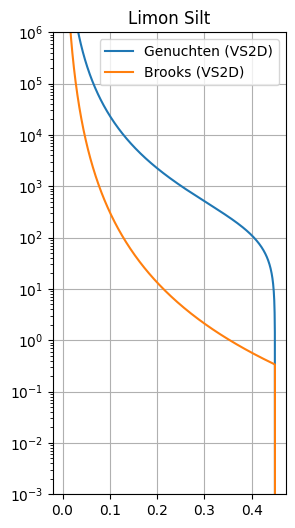

In [10]:
# get for both genuchten and brooks from VS2D dataset
ls_gen = pe.Soil("Limon Silt").from_name(sm=pe.Genuchten)
ls_bro = pe.Soil("Limon Silt").from_name(sm=pe.Brooks)

ax = ls_gen.model.plot()
ls_bro.model.plot(ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels = [f"{x.model.__class__.__name__} ({x.source})" for x in [ls_gen, ls_bro]]
ax.legend(handles, labels)
ax.set_title(ls_gen.name)

### Comparing Parameters Across Datasets

When the same soil type is available in multiple databases, it's useful to compare their parameters. Different sources may give different values due to different measurement methodologies or soil samples used.